In [0]:
!pip install qiskit

In [3]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute

IBMQ.save_account('Token')  #Give the token value form the id
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

#Implementation of Deustch-Jozsa Algorithm

Here Deustch-Jozsa algorithm is implemented taking the top input $|\textbf{x}\rangle = |x_0x_1\rangle$ consisting of 2 bits. We set the bottom input $|y\rangle = |1\rangle$. After that we apply H gate to each of the input lines, both $|\textbf{x}\rangle (= |x_0x_1\rangle)$ and $|y\rangle$ and then pass it through the function.

At last we pass the top output lines through H gates. The top output bit corresponds to $|\textbf{x}\rangle$ and the bottom output corresponds to $|y\oplus f(\textbf{x})\rangle$ where all of the output lines will give superpositioned states.

#Constant Function
There can be two constant functions. Both of them are implemented below:

Here all possible inputs of $|\textbf{x}\rangle = |x_0x_1\rangle$ will map into $|0\rangle$ as output. The function is defiined as below:

$f(\textbf{x}): \{0,1\}^2 \rightarrow \{0\}$

This produces the unitary matrix as below thinking the domain for $|y\rangle$ as $\{0,1\}$.

<center>
$\begin{pmatrix}
 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
\end{pmatrix}$
</center>

here each row corresponds to $|\textbf{x},y\rangle$ as input and each column corresponds to $|x,y\oplus f(\textbf{x})\rangle = |x,y\oplus 0\rangle = |x,y\rangle$ as output. This is clearly an identity matrix. So, we don't need any extra gate other than the H gate to implement this function, rather we will just pass the input as output stream.

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)

In [0]:
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# the implementation of the function f(x)
# as the unitary matrix is an identity matrix, it doesn't need any more gate
#

qc.h(q[0])
qc.h(q[1])

In [0]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

{'100': 479, '000': 521}


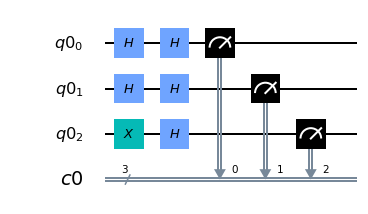

In [7]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

Here all possible inputs of $|\textbf{x}\rangle = |x_0x_1\rangle$ will map into $|1\rangle$ as output. The function is defiined as below:

<center> $f(\textbf{x}): \{0,1\}^2 \rightarrow \{1\}$ </center>

This produces the unitary matrix as below thinking the domain for $|y\rangle$ as $\{0,1\}$.

<center>
$\begin{pmatrix}
 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$
</center>

here each row corresponds to $|\textbf{x},y\rangle$ as input and each column corresponds to $|x,y\oplus f(\textbf{x})\rangle = |x,y\oplus 1\rangle = |x,\overline{y}\rangle$ as output. This is clearly an identity matrix. So, we don't need any extra gate other than the H gate to implement this function, rather we will just pass the input as output stream.

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)

In [9]:
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# the implementation of the function f(x)
# the funtion just toggles the bottom output. So we applied a X gate to y.
qc.x(q[2])
#

qc.h(q[0])
qc.h(q[1])

In [10]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

{'100': 476, '000': 524}


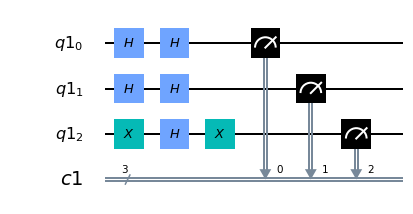

In [11]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

#Balanced Function

As we have taken $|\textbf{x}\rangle$ as 2 bits, there are 6 possible balanced functions. Each of them are implemented below:

Let's assume the function is defined as below:

<center> $f(\textbf{x}): \{0,1\}^2 \rightarrow \{0,1\}$ </center>

and

<center> $f(|00\rangle) = f(|01\rangle) = |0\rangle $ </center>
<center> $f(|10\rangle) = f(|11\rangle) = |1\rangle $ </center>

From these input output pairs we can see that by inspection, the output of the function is same as $|x_0\rangle$ qubit. So, we can place a $C_x$ gate between $|x_0\rangle$ and $|y\rangle$ where $|x_0\rangle$ is the controlling bit which will produce the same output as $|y\oplus f(\textbf{x})\rangle$.

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)

In [13]:
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# the implementation of the function f(x)
# the output of the function is same as x0. So we applied a CX gate between x0 and y.
qc.cx(q[0],q[2])
#

qc.h(q[0])
qc.h(q[1])

In [14]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

{'101': 513, '001': 487}


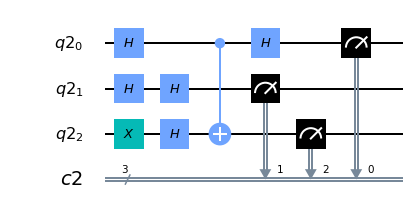

In [15]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

Let's assume the function is defined as below:

<center> $f(\textbf{x}): \{0,1\}^2 \rightarrow \{0,1\}$ </center>

and

<center> $f(|00\rangle) = f(|01\rangle) = |1\rangle $ </center>
<center> $f(|10\rangle) = f(|11\rangle) = |0\rangle $ </center>

From these input output pairs we can see that by inspection, the inverse of the output of the function is same as $|x_0\rangle$ qubit. So, we can place a $C_x$ gate between $|\overline{x_0}\rangle$ and $|y\rangle$ where $|\overline{x_0}\rangle$ is the controlling bit which will produce the same output as $|y\oplus f(\textbf{x})\rangle$.

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)

In [17]:
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# the implementation of the function f(x)
# the output of the function is same as the inverse of x0. So we applied an X gate to x0 and then CX gate between x0 and y.
qc.x(q[0])
qc.cx(q[0],q[2])
#

qc.h(q[0])
qc.h(q[1])

In [18]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

{'101': 515, '001': 485}


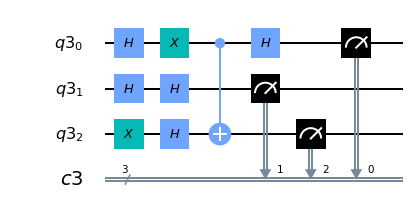

In [19]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

Let's assume the function is defined as below:

<center> $f(\textbf{x}): \{0,1\}^2 \rightarrow \{0,1\}$ </center>

and

<center> $f(|00\rangle) = f(|10\rangle) = |0\rangle $ </center>
<center> $f(|01\rangle) = f(|11\rangle) = |1\rangle $ </center>

From these input output pairs we can see that by inspection, the output of the function is same as $|x_1\rangle$ qubit. So, we can place a $C_x$ gate between $|x_1\rangle$ and $|y\rangle$ where $|x_1\rangle$ is the controlling bit which will produce the same output as $|y\oplus f(\textbf{x})\rangle$.

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)

In [21]:
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# the implementation of the function f(x)
# the output of the function is same as x1. So we applied a CX gate between x1 and y.
qc.cx(q[1],q[2])
#

qc.h(q[0])
qc.h(q[1])

In [22]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

{'010': 498, '110': 502}


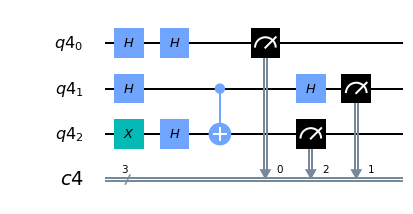

In [23]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

Let's assume the function is defined as below:

<center> $f(\textbf{x}): \{0,1\}^2 \rightarrow \{0,1\}$ </center>

and

<center> $f(|00\rangle) = f(|10\rangle) = |1\rangle $ </center>
<center> $f(|01\rangle) = f(|11\rangle) = |0\rangle $ </center>

From these input output pairs we can see that by inspection, the inverse of the output of the function is same as $|x_1\rangle$ qubit. So, we can place a $C_x$ gate between $|\overline{x_1}\rangle$ and $|y\rangle$ where $|\overline{x_1}\rangle$ is the controlling bit which will produce the same output as $|y\oplus f(\textbf{x})\rangle$.

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)

In [25]:
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# the implementation of the function f(x)
# the output of the function is same as inverse of x1. So we applied an X gate to x1 and then a CX gate between x1 and y.
qc.x(q[1])
qc.cx(q[1],q[2])
#

qc.h(q[0])
qc.h(q[1])

In [26]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

{'010': 478, '110': 522}


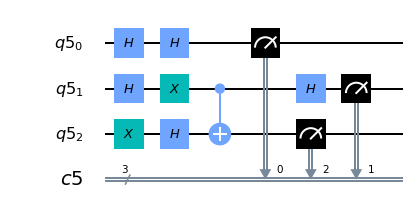

In [27]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

Let's assume the function is defined as below:

<center> $f(\textbf{x}): \{0,1\}^2 \rightarrow \{0,1\}$ </center>

and

<center> $f(|00\rangle) = f(|11\rangle) = |0\rangle $ </center>
<center> $f(|01\rangle) = f(|10\rangle) = |1\rangle $ </center>

From these input output pairs we can see that by inspection, the output of the function is same as $|x_0 \oplus x_1\rangle$ qubit. So, we can place a $C_x$ gate between $|x_0\rangle$ and $|x_1\rangle$ and another between $|x_1\rangle$ and $|y\rangle$  where $|x_0\rangle$ is the controlling bit for the first $C_x$ gate and $|x_1\rangle$ is the controlling bit of the second $C_x$ gate.

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)

In [29]:
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# the implementation of the function f(x)
# the output of the function is same as XOR of x0 and x1. So we applied a CX gate between x0 and x1 and then another CX gate between x1 and y.
qc.cx(q[0],q[1])
qc.cx(q[1],q[2])
#

qc.h(q[0])
qc.h(q[1])

In [30]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

{'010': 469, '110': 531}


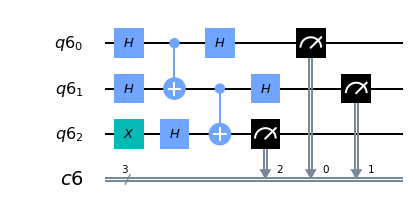

In [31]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')

Let's assume the function is defined as below:

<center> $f(\textbf{x}): \{0,1\}^2 \rightarrow \{0,1\}$ </center>

and

<center> $f(|00\rangle) = f(|11\rangle) = |1\rangle $ </center>
<center> $f(|01\rangle) = f(|10\rangle) = |0\rangle $ </center>

From these input output pairs we can see that by inspection, the output of the function is same as $|\overline{x_0 \oplus x_1}\rangle$ qubit. So, we can place a $C_x$ gate between $|x_0\rangle$ and $|x_1\rangle$, after that an $X$ gate to $x_1$ and finally another $C_x$ gate between $|x_1\rangle$ and $|y\rangle$  where $|x_0\rangle$ is the controlling bit for the first $C_x$ gate and $|x_1\rangle$ is the controlling bit of the second $C_x$ gate.

In [0]:
q = QuantumRegister(3)
c = ClassicalRegister(3)

qc = QuantumCircuit(q,c)

In [33]:
qc.x(q[2])
qc.h(q[0])
qc.h(q[1])
qc.h(q[2])

# the implementation of the function f(x)
# the output of the function is same as the inverse of the XOR of x0 and x1. So we applied a CX gate between x0 and x1 and after that a X gate to x1 and then another CX gate between x1 and y.
qc.cx(q[0],q[1])
qc.x(q[1])
qc.cx(q[1],q[2])
#

qc.h(q[0])
qc.h(q[1])

In [34]:
qc.measure(q[0],c[0])
qc.measure(q[1],c[1])
qc.measure(q[2],c[2])

{'010': 488, '110': 512}


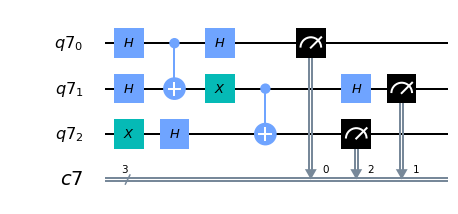

In [35]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1000)
result = job.result()
count =result.get_counts()
print(count)
qc.draw(output='mpl')